In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
from plot_image import plot_set_images
from plot_image import plot_orinale_image_with_prediction
from extract_prostate_region import extract_prostate_region
from extract_prostate_region import extract_prostate_region_validation
from feature_eng import feature_eng
from outlier_detection import outliers_clean_resampling
from outlier_detection import plot_outliers
from outlier_detection import check_resultofdropping
from outlier_detection import outliers_clean_resampling_group

In [4]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)

In [5]:
data=dataset["dataset"]
type(data)

numpy.ndarray

In [6]:
for i in range(len(data)):
    print(data[i][0][0][0][0][:,:,:,1].shape)

(34, 41, 31)
(80, 82, 82)
(82, 74, 80)
(89, 102, 85)
(66, 78, 62)
(69, 83, 66)
(50, 57, 48)
(55, 69, 54)
(64, 65, 63)
(99, 83, 80)
(107, 99, 85)
(320, 320, 39)
(320, 320, 43)
(320, 320, 39)


In [7]:
sum = 0
for i in range (len(data)):
    sum = sum + data[i][0][0][0][0].size
sum    

85436685

# visualization #

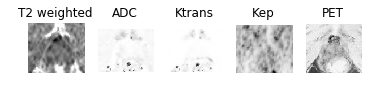

In [8]:
stuck,slice = 3,23
plot_set_images(data,stuck,slice)

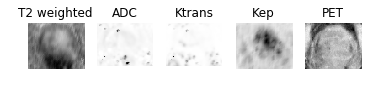

In [9]:
stuck,slice = 7,23
plot_set_images(data,stuck,slice)

The meaning of index:
<br>
index 1 stands for the prediction of doctoe A
<br>
index 2 stands for the prediction of doctoe B
<br>
for stuck numbered between 10 and 13, index 3 stands for the precision prediction 

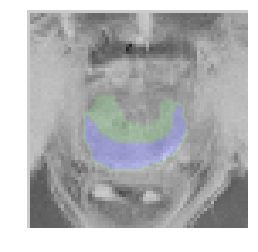

In [10]:
stuck,slices,index,features=8,24,1,4
plot_orinale_image_with_prediction(data,stuck,index,slices,features)

# extract_prostate_region #

There are two choice of data_stuck_num: 11,14
<br>
In this experiment, we use the mapping defined on script for traing data.
<br>
There is another function below:extract_prostate_region_validation. In this fuction, we use the ground truth.

In [11]:
data_stuck_num=11
train_feature,train_label = extract_prostate_region(data,data_stuck_num)

In [12]:
len(train_feature)

355455

In [13]:
validation_label,validation_feature=extract_prostate_region_validation(data)

In [14]:
len(validation_label)

70027

In [15]:
train_feature.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_feature.csv",index=True)
train_label.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv",index=True)
validation_feature.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature.csv",index=True)
validation_label.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv",index=True)

# Normalization #

  construct the whole pipeline of the features enginerring
- Transform the first feature TR wighted
- normalize all the features

In [18]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [19]:
X_train_scaled=feature_eng.fit_transform(X_train.drop('Unnamed: 0',1))

In [20]:
X_val_scaled=feature_eng.transform(X_val.drop('Unnamed: 0',1))

In [21]:
X_val_scaled.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv",index=True)
X_train_scaled.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv",index=False)

In [22]:
X_val_scaled[:10]

feature0  feature1  feature2  feature3  feature4
0  1.496713 -0.508974 -0.266269 -0.708827  0.480083
1  1.493759 -0.549401 -0.243492 -0.774610  0.952082
2  0.229118 -0.260003 -0.285134 -0.441109  2.077617
3  0.558443 -0.086173 -0.267538 -0.495074  0.719713
4  0.833441  0.024761 -0.256189 -0.540253 -0.100838
5  1.140704 -0.006060 -0.250115 -0.581308  0.654360
6  1.464060 -0.016312 -0.236356 -0.624755  1.358727
7  1.662426 -0.096102 -0.216974 -0.682210  2.244632
8  1.683592 -0.201589 -0.201712 -0.750188  2.847339
9  2.002994 -0.292518 -0.185280 -0.807845  3.159584

# Outlier detection #

In [4]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [41]:
X_train[y_train['source_of_pixel']==10]

feature0  feature1  feature2  feature3  feature4
322943 -1.723106 -0.870686 -0.184323  1.074615 -0.265678
322944 -1.712662 -0.940848 -0.123424  1.049563 -0.188456
322945 -1.656328 -0.866285 -0.119899  0.913143 -0.704564
322946 -1.718698 -0.733657 -0.149392  0.664549 -0.885346
322947 -1.772281 -0.989627 -0.148423  1.223540 -0.831315
322948 -1.690379 -1.060036 -0.091907  1.190819 -0.702989
322949 -1.611855 -1.005111 -0.112001  1.062780 -1.208650
322950 -1.638089 -0.829786 -0.155633  0.867256 -0.956794
322951 -1.596173 -0.662009 -0.192325  0.671731 -1.099144
322952 -1.723182 -0.623972 -0.199316  0.719191 -1.190396
322953 -1.857890 -0.637859 -0.154456  1.042140 -1.165922
322954 -1.817412 -0.611509 -0.063341  1.365088 -1.183317
322955 -1.304679 -0.467405  0.316891 -0.399335 -0.520010
322956 -1.308127 -0.535192  0.302745 -0.317933 -0.482128
322957 -1.723130 -0.712160 -0.139977  1.283899 -0.795235
322958 -1.752823 -0.962880 -0.113488  1.251179 -1.070472
322959 -1.643280 -1.053456 -0.107930  1.185554 -0.897842
322960 -1.541269 -0.999916 -0.150412  0.957893 -1.076682
322961 -1.576715 -0.804047 -0.194212  0.762368 -1.017921
322962 -1.579043 -0.590891 -0.221257  0.659185 -1.069347
322963 -1.766588 -0.522193 -0.219331  0.912605 -1.232893
322964 -1.785667 -0.529882 -0.182759  1.235553 -1.286262
322965 -1.779993 -0.532859 -0.126306  1.483701 -1.150185
322966 -0.945458 -0.516647  0.210218 -0.462448  0.196486
322967 -0.960824 -0.488128  0.236039 -0.381046 -0.125628
322968 -0.954892 -0.498284  0.245936 -0.283260 -0.468095
322969 -1.703672 -0.641554 -0.112251  1.224311 -0.809149
322970 -1.705724 -0.809100 -0.120853  1.158686 -0.463925
322971 -1.572694 -0.872036 -0.162465  0.844517 -0.746666
322972 -1.479894 -0.794048 -0.210465  0.616855 -1.059044
...          ...       ...       ...       ...       ...
355425 -1.576045  0.091953 -0.183634  0.232556 -0.272602
355426 -1.682393 -0.025140 -0.185217  0.279726 -0.254665
355427 -1.867729 -0.176049 -0.191378  0.308258 -0.195663
355428 -1.795236 -0.274151 -0.198179  0.195853 -0.774327
355429 -1.352108 -0.657679 -0.263937 -1.011251 -1.468269
355430 -0.886260 -0.747587 -0.283365 -0.966125 -1.516685
355431 -0.403591 -0.666342 -0.274411 -0.920104 -1.238921
355432 -0.248125 -0.074371 -0.102765 -0.867521 -0.427034
355433 -0.042804  0.312362  0.394473 -0.796231 -0.899133
355434  0.521482  0.185244  0.048731 -0.411751  0.374868
355435 -0.422945  0.010702 -0.153059 -0.398403  0.023149
355436 -0.600378  0.034060 -0.163581 -0.268640 -0.675780
355437 -0.907398  0.025681 -0.149025 -0.067263 -0.319320
355438 -1.420062 -0.025250 -0.143538  0.112185 -0.273994
355439 -0.948371 -0.096394 -0.147321  0.096451 -0.349132
355440 -1.493136 -0.167050 -0.154891  0.134492  0.017862
355441 -1.183866 -0.771599 -0.273067 -0.954420 -1.488060
355442 -0.682979 -0.630442 -0.260611 -0.946476 -0.753270
355443 -0.269157 -0.159703 -0.128130 -0.922321  0.130828
355444 -0.000491  0.245003  0.242872 -0.849670 -0.960804
355445 -0.440537  0.323648  0.522798 -0.729719 -1.097740
355446 -0.524749  0.236179  0.299115 -0.483843 -0.470654
355447  0.527469  0.057955 -0.044238 -0.470494  0.506151
355448 -0.462676 -0.039751 -0.162826 -0.345786 -0.374283
355449 -0.751415 -0.106848 -0.121872 -0.148711 -0.234780
355450 -0.686041 -0.201468 -0.090835 -0.076490 -0.363643
355451 -0.725539  0.088665  0.017449 -0.542586 -1.027009
355452  0.899093 -0.049392 -0.150487 -0.596451  0.706511
355453 -0.679602 -0.073922 -0.203510 -0.601505  1.156466
355454 -0.201922 -0.049809 -0.161370 -0.427234 -0.216379

[32512 rows x 5 columns]

In [5]:
X_data_after_detection,y_data_after_detection,y_dropped,robust_dis=outliers_clean_resampling(p_free=5,n_subsamples=253,labels=y_train).fit_transform(X_train)

drop count: 13025


In [6]:
X_data_after_detection_grouped,y_data_after_detection_grouped,y_dropped_grouped,robust_dis_grouped=outliers_clean_resampling_group(X_train,y_train,11)

current executing data stuck: 0
drop count: 24
            
current executing data stuck: 1
drop count: 4902
            
current executing data stuck: 2
drop count: 2176
            
current executing data stuck: 3
drop count: 2877
            
current executing data stuck: 4
drop count: 120
            
current executing data stuck: 5
drop count: 66
            
current executing data stuck: 6
drop count: 24200
            
current executing data stuck: 7
drop count: 3434
            
current executing data stuck: 8
drop count: 82
            
current executing data stuck: 9
drop count: 5495
            
current executing data stuck: 10
drop count: 2285
            


In [7]:
robust_dis_grouped

robust_dis  source_of_pixel
0        2.339420              0.0
1        2.173796              0.0
2        2.394357              0.0
3        2.365021              0.0
4        2.635967              0.0
5        2.522802              0.0
6        2.708873              0.0
7        2.802488              0.0
8        3.055576              0.0
9        2.764593              0.0
10       2.466017              0.0
11       2.346594              0.0
12       2.322872              0.0
13       2.300848              0.0
14       1.992727              0.0
15       2.257728              0.0
16       2.382326              0.0
17       2.636301              0.0
18       2.556400              0.0
19       2.598281              0.0
20       2.550764              0.0
21       2.399120              0.0
22       2.633600              0.0
23       3.134957              0.0
24       3.464747              0.0
25       3.017959              0.0
26       2.586182              0.0
27       2.272037              0.0
28       2.128419              0.0
29       2.026267              0.0
...           ...              ...
32482    6.306595             10.0
32483    5.158260             10.0
32484    4.130710             10.0
32485    4.048303             10.0
32486    4.997967             10.0
32487    4.395700             10.0
32488    4.410697             10.0
32489    8.399458             10.0
32490   10.581180             10.0
32491    8.518976             10.0
32492    7.395619             10.0
32493    7.445083             10.0
32494    6.359467             10.0
32495    5.275036             10.0
32496    4.596640             10.0
32497    3.954169             10.0
32498    4.269731             10.0
32499    4.292514             10.0
32500    7.636454             10.0
32501   10.611242             10.0
32502    9.996877             10.0
32503    8.380677             10.0
32504    7.748600             10.0
32505    6.856578             10.0
32506    5.113363             10.0
32507    3.814022             10.0
32508    8.364726             10.0
32509    7.668812             10.0
32510    7.290245             10.0
32511    7.031101             10.0

[355455 rows x 2 columns]

In [45]:
robust_dis_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis_grouped.csv",index=True)
robust_dis.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis.csv",index=True)

In [ ]:
robust_dis_grouped=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis_grouped.csv")
robust_dis=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis.csv")

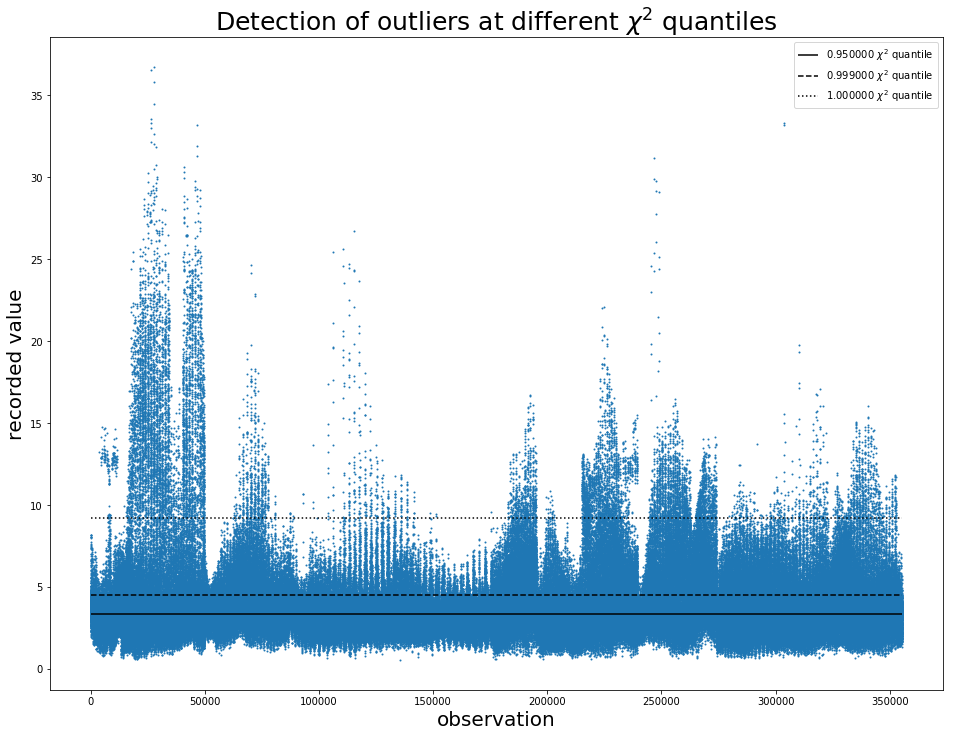

In [8]:
plot_outliers(robust_dis,0.95,0.999,0.99999999999999994375)

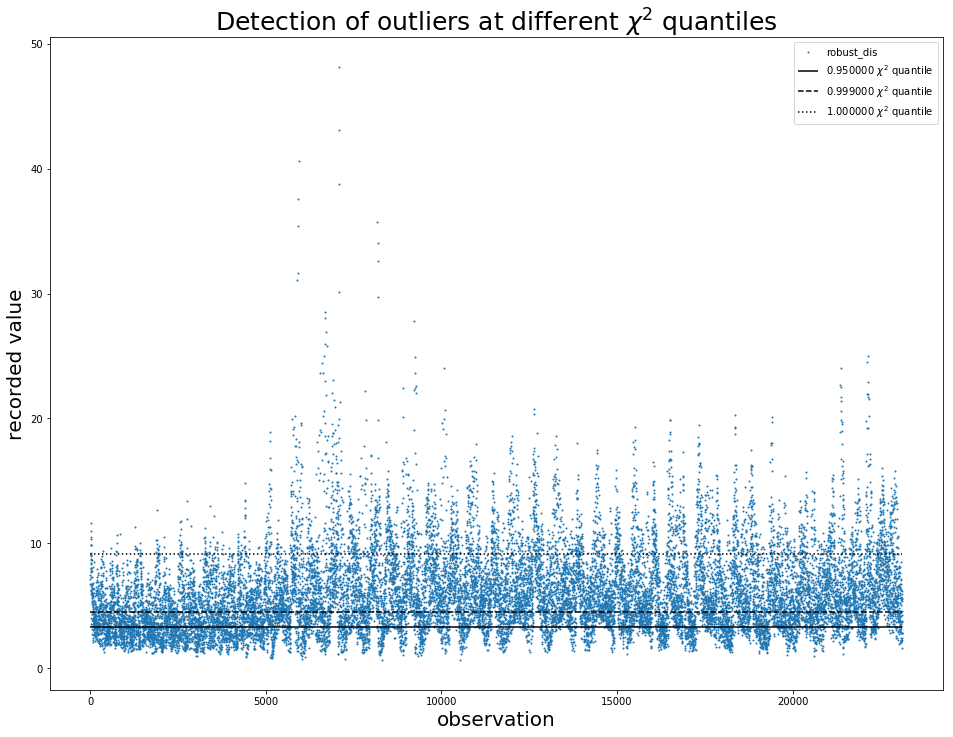

In [38]:
plot_outliers(robust_dis_grouped[robust_dis_grouped['source_of_pixel']==7]['robust_dis'],0.95,0.999,0.9999999999999999444888487)

In [33]:
len(X_train)

355455

In [34]:
len(X_data_after_detection_grouped)

309794

In [35]:
len(X_data_after_detection)

342430

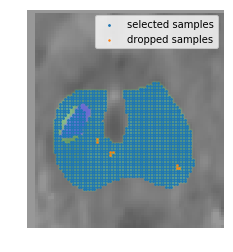

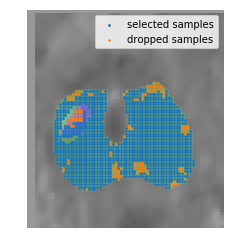

In [39]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=2,34,1,0
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection,y_dropped)
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection_grouped,y_dropped_grouped)

In [43]:
X_data_after_detection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection.csv",index=True)
y_data_after_detection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection.csv",index=True)

In [44]:
X_data_after_detection_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection_grouped.csv",index=True)
y_data_after_detection_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection_grouped.csv",index=True)

This is a wrong example which we did before. As it is shown, there are lots of points which are less likely to be wrong labeled dropped. We guess it is simply because that the features can have large variance although they are in the same cancer or non-cancer region.

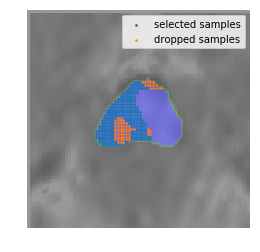

In [13]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=1,25,1,0
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection,y_dropped)

## Training set selection##

In [58]:
from training_set_selection import training_set_selection_miniBatch_kmeans
from training_set_selection import check_result_after_selection
from training_set_selection import training_set_selection_FCNN
from training_set_selection import training_set_selection_CNN
from sklearn.cluster import MiniBatchKMeans

In [49]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [54]:
y_train=y_train. drop("Unnamed: 0",1)
y_val=y_val. drop("Unnamed: 0",1)
X_val=X_val. drop("Unnamed: 0",1)

In [59]:
#apply the function with 30 samples in one cluster
X_after_kMeans_trainin_set_selection,y_after_kMeans_trainin_set_selection,center=training_set_selection_miniBatch_kmeans(labels=y_train,kmeans=MiniBatchKMeans(n_clusters=np.int((X_train.shape[0])/50),\
                                                                  n_init=1,max_iter=100,\
                                                                  init_size=3*np.int((X_train.shape[0])/50),verbose=-1,\
                                                                  random_state=42)).fit_transform(X_train)

fit start
Init 1/1 with method: k-means++
Inertia for init 1/1: 859.831530
Minibatch iteration 1/355500: mean batch inertia: 0.080423, ewa inertia: 0.080423 
Minibatch iteration 2/355500: mean batch inertia: 0.075163, ewa inertia: 0.080420 
Minibatch iteration 3/355500: mean batch inertia: 0.056506, ewa inertia: 0.080406 
Minibatch iteration 4/355500: mean batch inertia: 0.086410, ewa inertia: 0.080410 
Minibatch iteration 5/355500: mean batch inertia: 0.062057, ewa inertia: 0.080399 
Minibatch iteration 6/355500: mean batch inertia: 0.095525, ewa inertia: 0.080408 
Minibatch iteration 7/355500: mean batch inertia: 0.091391, ewa inertia: 0.080414 
Minibatch iteration 8/355500: mean batch inertia: 0.071553, ewa inertia: 0.080409 
Minibatch iteration 9/355500: mean batch inertia: 0.077429, ewa inertia: 0.080407 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 10/355500: mean batch inertia: 0.083162, ewa inertia: 0.080409 
Minibatch iteration 11/355500: mean batch in

Minibatch iteration 93/355500: mean batch inertia: 0.065887, ewa inertia: 0.080096 
Minibatch iteration 94/355500: mean batch inertia: 0.060490, ewa inertia: 0.080085 
Minibatch iteration 95/355500: mean batch inertia: 0.061274, ewa inertia: 0.080075 
Minibatch iteration 96/355500: mean batch inertia: 0.069516, ewa inertia: 0.080069 
Minibatch iteration 97/355500: mean batch inertia: 0.098173, ewa inertia: 0.080079 
Minibatch iteration 98/355500: mean batch inertia: 0.074694, ewa inertia: 0.080076 
Minibatch iteration 99/355500: mean batch inertia: 0.082289, ewa inertia: 0.080077 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 100/355500: mean batch inertia: 0.056856, ewa inertia: 0.080064 
Minibatch iteration 101/355500: mean batch inertia: 0.068959, ewa inertia: 0.080058 
Minibatch iteration 102/355500: mean batch inertia: 0.074499, ewa inertia: 0.080055 
Minibatch iteration 103/355500: mean batch inertia: 0.065274, ewa inertia: 0.080047 
Minibatch iteration 10

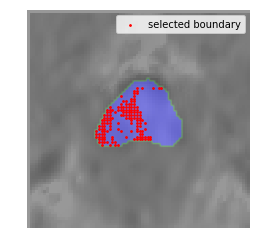

In [60]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)

In [61]:
X_after_FCNN,y_after_FCNN=training_set_selection_FCNN(X_train,y_train)

The tatal amount of data slices: 36
                           
current data slice:0
current count:26 current size of store:2464 time:  0.8 minute
current data slice:1
current count:27 current size of store:2444 time:  0.8 minute
current data slice:2
current count:28 current size of store:2516 time:  0.9 minute
current data slice:3
current count:24 current size of store:2595 time:  0.7 minute
current data slice:4
current count:28 current size of store:2563 time:  0.8 minute
current data slice:5
current count:25 current size of store:2515 time:  0.8 minute
current data slice:6
current count:27 current size of store:2557 time:  0.8 minute
current data slice:7
current count:25 current size of store:2444 time:  0.8 minute
current data slice:8
current count:28 current size of store:2519 time:  0.9 minute
current data slice:9
current count:28 current size of store:2504 time:  0.8 minute
current data slice:10
current count:32 current size of store:2615 time:  0.9 minute
current data slice:11


In [62]:
len(y_after_FCNN)

89524

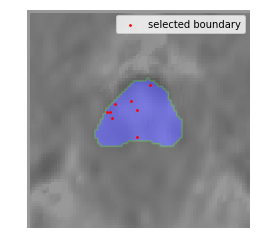

In [63]:
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)

In [64]:
X_after_CNN,y_after_CNN=training_set_selection_CNN(X_train,y_train)

The tatal amount of data slices: 36
                           
current data slice:0
During this iteratiron, 7602 data is discarded
this interation costs time:  0.8 minute
              
current data slice:1
During this iteratiron, 7580 data is discarded
this interation costs time:  0.9 minute
              
current data slice:2
During this iteratiron, 7485 data is discarded
this interation costs time:  0.9 minute
              
current data slice:3
During this iteratiron, 7417 data is discarded
this interation costs time:  0.9 minute
              
current data slice:4
During this iteratiron, 7581 data is discarded
this interation costs time:  0.9 minute
              
current data slice:5
During this iteratiron, 7642 data is discarded
this interation costs time:  0.9 minute
              
current data slice:6
During this iteratiron, 7451 data is discarded
this interation costs time:  0.9 minute
              
current data slice:7
During this iteratiron, 7448 data is discarded
this in

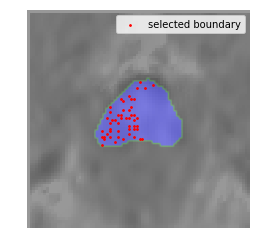

In [65]:
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

In [66]:
len(y_after_CNN)

86412

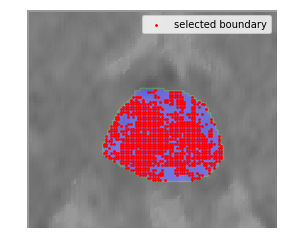

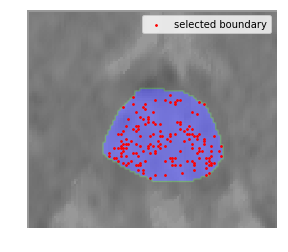

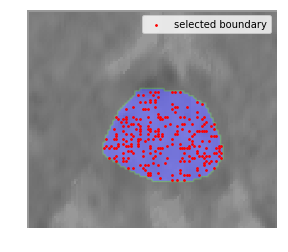

In [67]:
stuck,slices,index,features=3,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

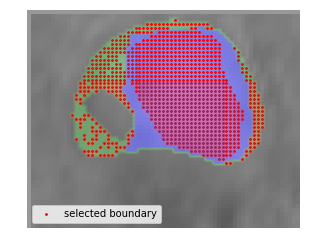

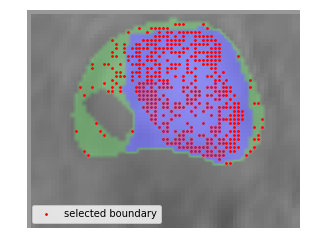

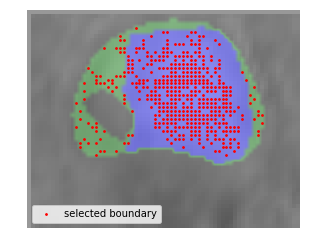

In [71]:
stuck,slices,index,features=7,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

In [72]:
X_after_FCNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv",index=False)
y_after_FCNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv",index=False)
X_after_kMeans_trainin_set_selection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv",index=False)
y_after_kMeans_trainin_set_selection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv",index=False)
X_after_CNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv",index=False)
y_after_CNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv",index=False)